<a href="https://colab.research.google.com/github/Meetra21/Media_Company_Time_Series/blob/main/Media_Company_Time_Series_RFE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Media Company Dataset**

A digital media company (like Voot, Hotstar, Netflix) had launched a show.

Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

**1. Looking at Data & Preprocessing**

In [ ]:
import numpy as np
np.random.seed(21)

In [ ]:
import pandas as pd

df=pd.read_csv('mediacompany.csv')
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [ ]:
df.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Unnamed: 7'],
      dtype='object')

In [ ]:
df['Unnamed: 7']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
75   NaN
76   NaN
77   NaN
78   NaN
79   NaN
Name: Unnamed: 7, Length: 80, dtype: float64

In [ ]:
import numpy as np

df['Unnamed: 7'].unique()

array([nan])

In [ ]:
df=df.drop('Unnamed: 7',axis=1)

Let's change date column:

In [ ]:
df['Date'] #or df.Date

0      3/1/2017
1      3/2/2017
2      3/3/2017
3      3/4/2017
4      3/5/2017
        ...    
75    5/15/2017
76    5/16/2017
77    5/17/2017
78    5/18/2017
79    5/19/2017
Name: Date, Length: 80, dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.head(1)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0


In [ ]:
df['Date'].dt.day_name()

0     Wednesday
1      Thursday
2        Friday
3      Saturday
4        Sunday
        ...    
75       Monday
76      Tuesday
77    Wednesday
78     Thursday
79       Friday
Name: Date, Length: 80, dtype: object

In [ ]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

df['day_name']=df['Date'].dt.day_name()
df['weekday']=df['Date'].dt.weekday

In [ ]:
df['year'].unique(), df['month'].unique(), df['day'].unique()

(array([2017]),
 array([3, 4, 5]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]))

In [ ]:
df.head(7)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,year,month,day,day_name,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2017,3,1,Wednesday,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2017,3,2,Thursday,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2017,3,3,Friday,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,2017,3,4,Saturday,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,2017,3,5,Sunday,6
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,2017,3,6,Monday,0
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,2017,3,7,Tuesday,1


So weekdays M-F are from 0-4:

**2. Visualizing Data**

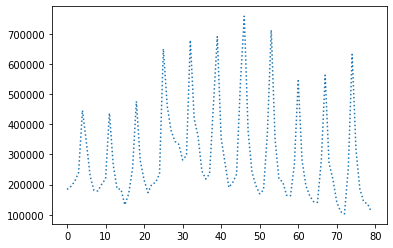

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Views_show'], linestyle='dotted');

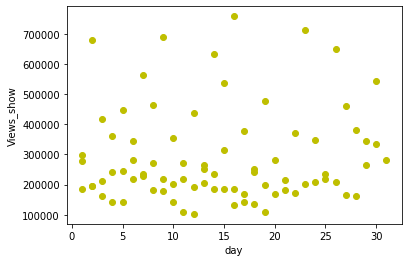

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df['day'], y=df['Views_show'], color='y')
plt.xlabel('day')
plt.ylabel('Views_show');

In [ ]:
df.corr()['Views_show'].sort_values(ascending=False)

Views_show             1.000000
Ad_impression          0.785673
Views_platform         0.604279
Visitors               0.535290
weekday                0.410886
Character_A            0.402533
day                    0.069978
month                 -0.065494
Cricket_match_india   -0.083154
year                        NaN
Name: Views_show, dtype: float64

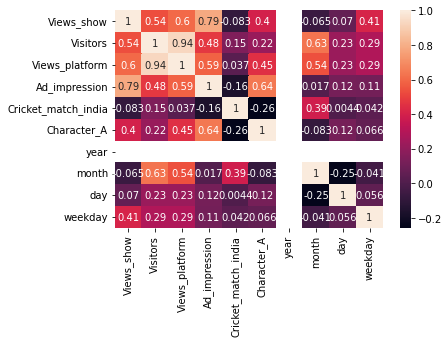

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True);

**3. Training The Data**

In [ ]:
x=df.drop(['Date','Views_show','day_name'], axis=1).copy()
y=df['Views_show'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
xtrain=scaler.fit_transform(x_train)
xtest=scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
xtrain=scaler.fit_transform(x_train)

**4. Model Selection using RFE OR RFECV**

RFE

class sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lin_reg=LinearRegression()
rfe=RFE(lin_reg)

rfe.fit(xtrain,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [ ]:
rfe.n_features_

4

In [ ]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False])

In [ ]:
rfe.ranking_

array([1, 3, 1, 2, 4, 6, 1, 1, 5])

In [ ]:
pd.DataFrame(rfe.ranking_, index=x_train.columns)

,0
Visitors,1
Views_platform,3
Ad_impression,1
Cricket_match_india,2
Character_A,4
year,6
month,1
day,1
weekday,5


In [ ]:
list=['Cricket_match_india','Character_A','year','weekday']

x_train_rfe=x_train.drop(list,axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

xtrain=scaler.fit_transform(x_train_rfe)

x_test_rfe=x_test.drop(list, axis=1)
xtest=scaler.transform(x_test_rfe)

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lin_reg,xtrain,y_train,cv=10,scoring='neg_mean_squared_error')
np.sqrt(-scores).mean().round(1), np.sqrt(-scores).std().round(1)

(69908.6, 21158.1)

**Making Predictions**

In [ ]:
lin_reg.fit(xtrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred=lin_reg.predict(xtest)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

r2=r2_score(y_test,y_pred)

print('rmse:', rmse.round(1))
print('r2_score:',r2.round(1))

rmse: 71767.2
r2_score: 0.7


In [ ]:
y_test.shape

(20,)

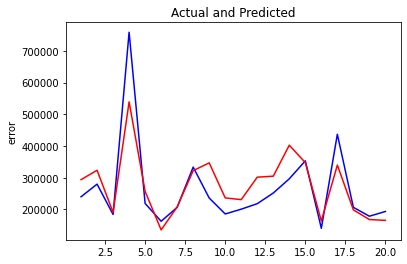

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,21),y_test,color='b')
plt.plot(range(1,21),y_pred,color='r')

plt.ylabel('error')
plt.title('Actual and Predicted');

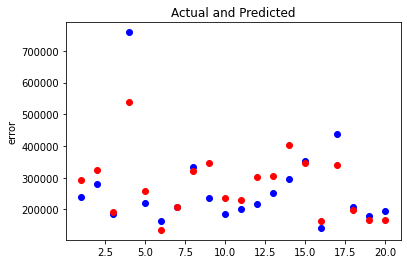

In [ ]:
plt.scatter(range(1,21),y_test,color='b')
plt.scatter(range(1,21),y_pred,color='r')

plt.ylabel('error')
plt.title('Actual and Predicted');

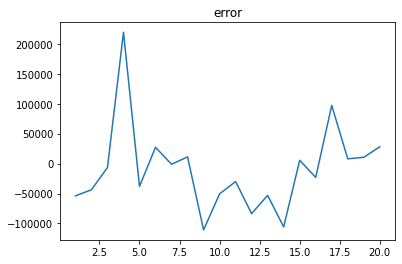

In [ ]:
plt.plot(range(1,21), y_test-y_pred)
plt.title('error');

**Confidence Interval**

scipy.stats.sem

scipy.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')

Calculate the standard error of the mean of the values in the input array.

In [ ]:
from scipy import stats

confidence=0.95
err=(y_test-y_pred)**2

conf=stats.t.interval(confidence, len(err)-1,
                 loc=np.mean(err),scale=stats.sem(err))

np.sqrt(conf).round(1)

array([  8940.4, 101099.5])